In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd Desktop/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1659381341729.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,07/29/2022,4130.29,--,4087.33,4140.15,4079.22
1,07/28/2022,4072.43,--,4026.13,4078.95,3992.97
2,07/27/2022,4023.61,--,3951.43,4039.56,3951.43
3,07/26/2022,3921.05,--,3953.22,3953.22,3910.74
4,07/25/2022,3966.84,--,3965.72,3975.30,3943.46
...,...,...,...,...,...,...
2542,08/07/2012,1401.35,--,1394.46,1407.14,1394.46
2543,08/06/2012,1394.23,--,1391.04,1399.63,1391.04
2544,08/03/2012,1390.99,--,1365.45,1394.16,1365.45
2545,08/02/2012,1365.00,--,1375.13,1375.13,1354.65


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2547.000000,2547.000000,2547.000000,2547.000000
mean,2627.443239,2604.395485,2617.933396,2589.659863
std,874.090366,917.051620,923.107704,910.179855
min,1353.330000,0.000000,0.000000,0.000000
25%,1989.065000,1983.780000,1991.395000,1974.815000
50%,2433.790000,2434.150000,2442.970000,2422.880000
75%,3016.930000,3016.240000,3032.115000,3000.670000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2515.000000,2515.000000,2515.000000,2515.000000
mean,2637.995753,2637.532922,2651.243085,2622.609809
std,874.105531,874.215346,880.129035,867.480813
min,1353.330000,1353.360000,1360.620000,1343.350000
25%,1995.500000,1995.720000,2005.060000,1985.860000
50%,2444.040000,2444.720000,2453.960000,2435.750000
75%,3037.225000,3039.260000,3064.565000,3006.700000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2515 non-null   object 
 1   Close/Last  2515 non-null   float64
 2   Volume      2515 non-null   object 
 3   Open        2515 non-null   float64
 4   High        2515 non-null   float64
 5   Low         2515 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.5+ KB


In [5]:
df.shape

(2515, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

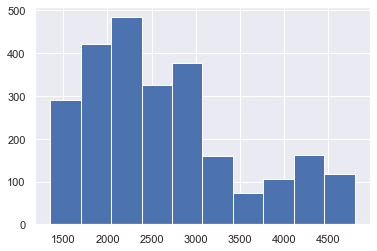

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4130.29

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2637.995753479135

In [10]:
close_sd = df['Close/Last'].std()
close_sd

874.1055305521546

In [11]:
sigma1 = close_mean + close_sd
sigma1

3512.1012840312897

In [12]:
sigma2 = close_mean + (2 * close_sd)
sigma2

4386.206814583445

In [13]:
sigma3 = close_mean + (3 * close_sd)
sigma3

5260.312345135599

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2515 non-null   datetime64[ns]
 1   Close/Last  2515 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.9 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2012-08-01 to 2022-07-29')

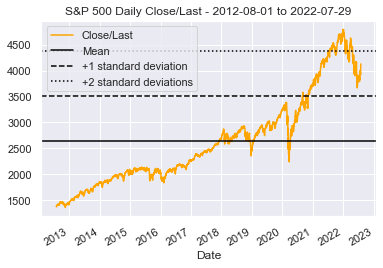

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2012-08-01 to 2022-07-29')

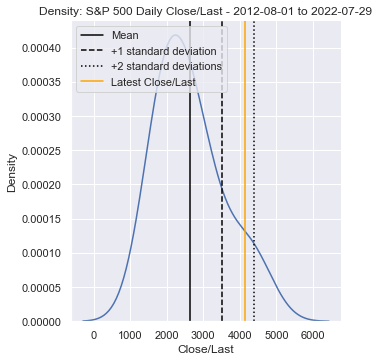

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.7072243503346936